# pima-indians-diabetes-database

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print(df.shape)

(768, 9)


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
class_counts = df['Outcome'].value_counts()
class_counts

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
min_class_count = class_counts.min()

In [12]:
balanced_df = df.groupby('Outcome').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)

/tmp/ipykernel_228256/1898936807.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Outcome').apply(lambda x: x.sample(min_class_count)).reset_index(drop=True)


In [13]:
balanced_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,130,64,0,0,23.1,0.314,22,0
1,6,137,61,0,0,24.2,0.151,55,0
2,8,99,84,0,0,35.4,0.388,50,0
3,4,92,80,0,0,42.2,0.237,29,0
4,2,99,60,17,160,36.6,0.453,21,0


In [14]:
balanced_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
531,1,180,0,0,0,43.3,0.282,41,1
532,0,167,0,0,0,32.3,0.839,30,1
533,6,0,68,41,0,39.0,0.727,41,1
534,4,156,75,0,0,48.3,0.238,32,1
535,8,125,96,0,0,0.0,0.232,54,1


In [15]:
class_counts = balanced_df['Outcome'].value_counts()
class_counts

Outcome
0    268
1    268
Name: count, dtype: int64

In [16]:
y_data = balanced_df[['Outcome']].values
balanced_df.drop('Outcome', axis=1, inplace=True)
X_data = balanced_df.values

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [18]:
X_data = torch.Tensor(X_data)
y_data = torch.LongTensor(y_data)
y_data = y_data.squeeze()

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [20]:
class PIDDModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(PIDDModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = F.softmax(output, dim=1)
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value        

In [21]:
model = PIDDModel(8, 2)

In [22]:
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[0], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[0])

tensor([[8.7782e-06, 9.9999e-01]])
tensor(1.0000)
tensor(1) tensor(0)


In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
print(model)

PIDDModel(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
)


In [25]:
model = PIDDModel(8, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 1000 # 1000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 0.8084052801132202
epoch 100th loss: 0.6059715151786804
epoch 200th loss: 0.564923882484436
epoch 300th loss: 0.5426220297813416
epoch 400th loss: 0.5263593792915344
epoch 500th loss: 0.5147954821586609
epoch 600th loss: 0.5034639835357666
epoch 700th loss: 0.49324831366539
epoch 800th loss: 0.4844997823238373
epoch 900th loss: 0.47793543338775635


In [26]:
n = 5
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[0.8997, 0.1003]])
tensor(1.)
tensor(0) tensor(0)


In [27]:
model = PIDDModel(8, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 2000 # 2000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 0.8145551085472107 test loss: 0.7903109788894653
epoch 100th training loss: 0.6200095415115356 test loss: 0.607785701751709
epoch 200th training loss: 0.6103740334510803 test loss: 0.613213300704956
epoch 300th training loss: 0.6035215258598328 test loss: 0.6178465485572815
epoch 400th training loss: 0.5982152819633484 test loss: 0.6174048185348511
epoch 500th training loss: 0.5941348671913147 test loss: 0.6150773167610168
epoch 600th training loss: 0.5907899141311646 test loss: 0.6121861338615417
epoch 700th training loss: 0.5881803035736084 test loss: 0.6111299991607666
epoch 800th training loss: 0.5847645401954651 test loss: 0.6052601933479309
epoch 900th training loss: 0.5805417895317078 test loss: 0.6038657426834106
epoch 1000th training loss: 0.5776106715202332 test loss: 0.6006360650062561
epoch 1100th training loss: 0.5743725299835205 test loss: 0.597383439540863
epoch 1200th training loss: 0.5663236975669861 test loss: 0.5945454835891724
epoch 1300th t

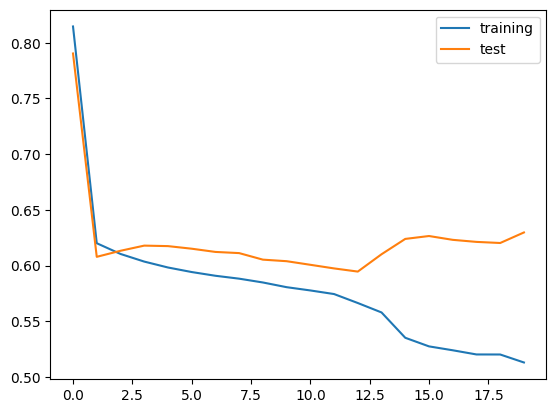

In [28]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.6574074074074074
